# Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your CSV file
df = pd.read_csv("dataset/data2.csv")

# Assuming 'label' is the label column
sentences = df['sentence']
individuals = df['individual']

# Extracting features (excluding the label column)
features = df.drop(columns=['sentence', 'individual'])
random_columns = np.random.choice(features.columns, size=8, replace=False)

# Select the columns
selected_features = df[random_columns]

# Get unique labels and assign colors
unique_sentences = sentences.unique()
sentence_color = sns.color_palette("husl", len(unique_sentences))

# Get unique labels and assign colors
unique_individual = individuals.unique()
individual_color = sns.color_palette("husl", len(unique_individual))

# Plot each feature in a separate graph
num_features = len(selected_features.columns)


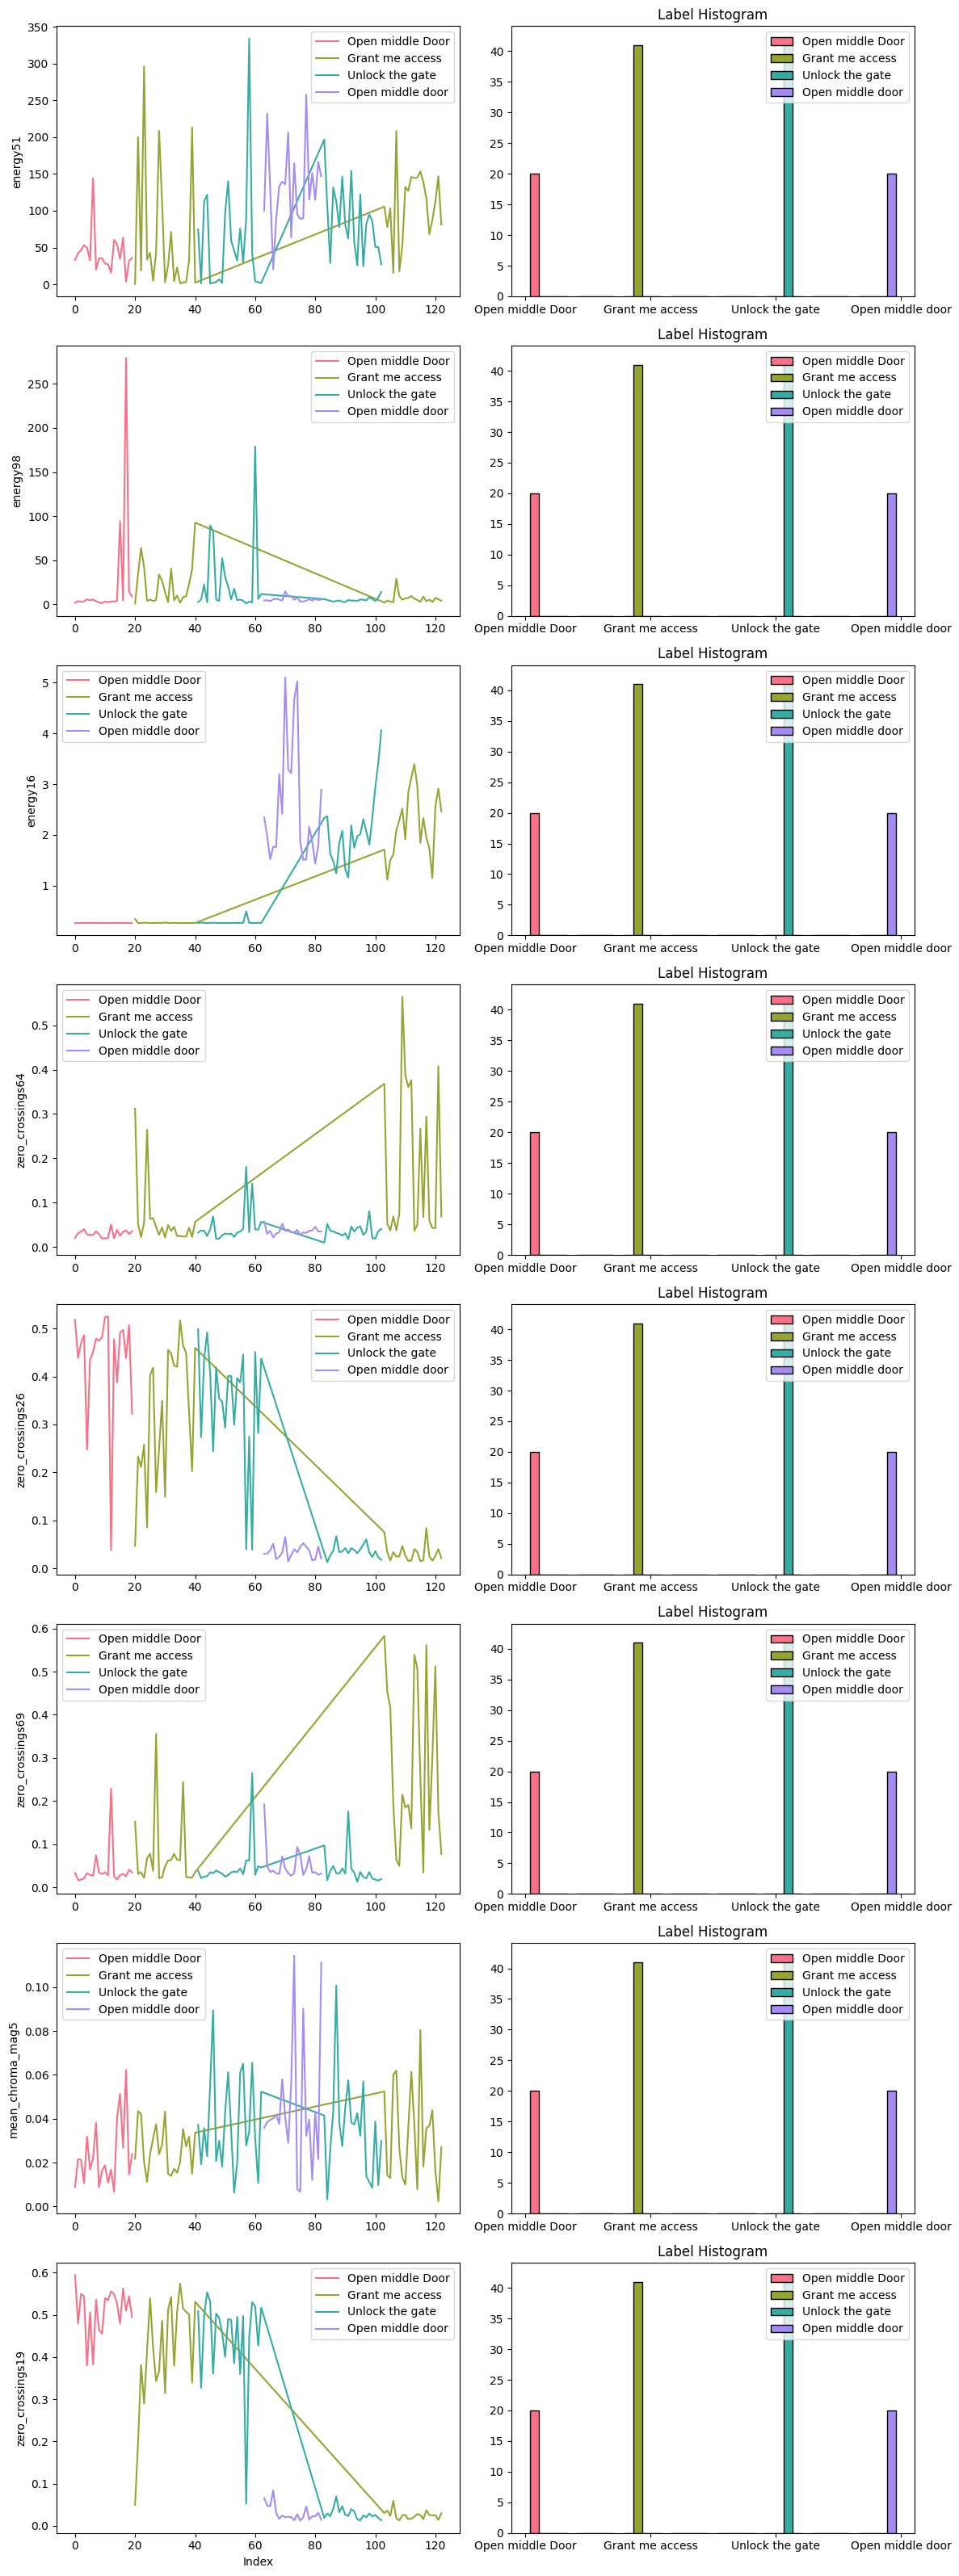

In [2]:
# Set up subplots for features
fig, axes = plt.subplots(num_features, 2, figsize=(12, 4 * num_features))

# Iterate through features
for i, feature in enumerate(selected_features.columns):
    # Plot feature as line with different colors for each label
    for sentence, color in zip(unique_sentences, sentence_color):
        subset = df[df['sentence'] == sentence]
        axes[i, 0].plot(subset.index, subset[feature], label=f'{sentence}', color=color)

    axes[i, 0].set_ylabel(feature)
    axes[i, 0].legend()

    # Plot histogram for labels with different colors
    axes[i, 1].hist([sentences[sentences == label] for label in unique_sentences], bins='auto', edgecolor='black', label=unique_sentences, color=sentence_color)
    axes[i, 1].set_title('Label Histogram')
    axes[i, 1].legend()

# Add a common X-axis label for features
axes[-1, 0].set_xlabel('Index')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Remove Outliers

In [3]:
import pandas as pd

def remove_outliers(df, factor=1.5):
    """
    Remove outliers from each column in a DataFrame using the IQR method.

    Parameters:
    - df: DataFrame
    - factor: Float, multiplier for IQR. Values outside (Q1 - factor * IQR, Q3 + factor * IQR) are considered outliers.

    Returns:
    - DataFrame without outliers.
    """
    df_no_outliers = pd.DataFrame()

    for column in df.columns:
        # Calculate the quartiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Filter values within the range (non-outliers)
        filtered_values = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]

        # Concatenate the column without outliers to the new DataFrame
        df_no_outliers = pd.concat([df_no_outliers, filtered_values], axis=1)

    return df_no_outliers

features = remove_outliers(features)


In [4]:
features.dropna(axis=0, inplace=True, thresh=280)
features.head

<bound method NDFrame.head of      mean_chroma_phase1  mean_chroma_phase2  mean_chroma_phase3  \
0             -2.847260            0.489295           -0.503390   
1              1.905757                 NaN           -0.369882   
2             -2.586586           -0.082852            0.246836   
3              2.518156           -0.629246            3.051131   
4              2.900859           -0.360961            0.611968   
..                  ...                 ...                 ...   
108            2.320551           -0.012103           -0.818591   
114            2.838967            0.958500           -0.444192   
115            2.787811           -0.379214           -1.172532   
118           -2.985333           -0.280324           -0.296645   
122           -2.162158            0.647251            0.119798   

     mean_chroma_phase4  mean_chroma_phase5  mean_chroma_phase6  \
0              1.820668            0.687962           -1.807051   
1              2.773081        

# Imports

In [5]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
import glob
from scipy import signal
import seaborn as sn
from sklearn.metrics import classification_report
import joblib

# Reading Data

In [6]:
# Load your CSV file
df = pd.read_csv("dataset/data2.csv")

x_df = df.iloc[:, :304]
y_df = df.iloc[:, 304]
ind_df = df.iloc[:, 305]

x_data=x_df.values
y_data=y_df.values
ind_data=ind_df.values

print(x_data.shape)
print(y_data.shape)
print(ind_data.shape)

(123, 304)
(123,)
(123,)


In [7]:
Xsc = StandardScaler().fit_transform(x_data)
Xsc=pd.DataFrame(Xsc)
y=pd.DataFrame(y_data)
Xsc.head()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
0,-1.613827,0.900451,-0.535598,0.399266,0.776601,-0.824300,0.299488,-1.406161,0.253365,-0.983449,...,-0.108685,-0.141902,-0.132116,-0.136474,-0.139869,-0.140899,-0.120788,-0.104304,-0.122951,-0.118269
1,0.412016,-1.877235,-0.461500,0.909249,-0.162232,0.767929,-0.386845,-0.813583,0.614147,-0.169318,...,-0.117633,-0.126472,0.032001,0.046337,-0.069127,-0.106627,-0.103337,-0.103309,-0.083197,-0.075339
2,-1.502721,0.275976,-0.119216,0.734681,0.424710,1.542447,0.296104,1.727937,0.844390,-0.492484,...,-0.123742,-0.142997,-0.127310,-0.130146,-0.130527,-0.135153,-0.115642,-0.102866,-0.123662,-0.117721
3,0.673034,-0.320391,1.437196,0.534514,1.198302,0.117673,1.500657,1.281164,-0.642221,-0.029587,...,-0.171325,-0.157487,-0.124275,-0.131760,-0.132732,-0.133956,-0.118112,-0.117422,-0.133023,-0.108231
4,0.836151,-0.027569,0.083436,0.940687,0.773411,-0.693298,0.502295,-1.369659,-1.002736,1.169866,...,0.008807,-0.035966,-0.079762,-0.106422,-0.124752,-0.118644,-0.109459,-0.098517,-0.100005,-0.080848


In [8]:
remove_outliers(Xsc)
Xsc.shape

(123, 304)

# Model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, test_size = 0.2, random_state = 0)


svc=SVC(class_weight='balanced') 
            
# Fit classifier to training set
svc.fit(X_train, y_train)

# Make predictions on test set - unseen daa
y_pred = svc.predict(X_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred):0.4f}')

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy score: 0.7600
[[5 0 0 2]
 [0 5 0 0]
 [0 0 3 0]
 [2 0 2 6]]


c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Results

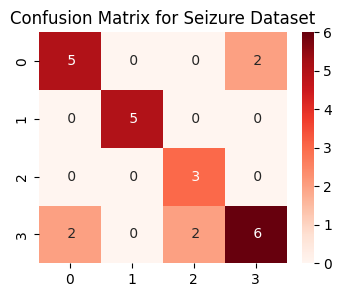

                  precision    recall  f1-score   support

 Grant me access       0.71      0.71      0.71         7
Open middle Door       1.00      1.00      1.00         5
Open middle door       0.60      1.00      0.75         3
 Unlock the gate       0.75      0.60      0.67        10

        accuracy                           0.76        25
       macro avg       0.77      0.83      0.78        25
    weighted avg       0.77      0.76      0.76        25



In [10]:
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix for Seizure Dataset')
sn.heatmap(cf_matrix, annot=True, fmt=' ', cmap='Reds')
plt.show()

print(classification_report(y_test, y_pred))

# Saving the Model

In [11]:
joblib.dump(svc, 'svm_model.pkl')

['svm_model.pkl']